<a href="https://colab.research.google.com/github/madenni/NN-DIP/blob/main/NS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen

## 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [2]:
model = keras.applications.VGG19()

574710816/574710816 [==============================] - 18s 0us/step


In [3]:
model.summary() # Вывод краткого описания архитектуры созданной модели
model.get_config() # Вывод конфигурации созданной модели

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

{'name': 'vgg19',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'block1_conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'block1_conv1',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class

In [4]:
def normalize(images, shape):
  proc_images = np.array(images)
  proc_images = cv2.resize(proc_images, (shape[0], shape[1]))
  proc_images = proc_images.reshape(-1, shape[0], shape[1], shape[2])

  return proc_images

## 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [6]:
urls = ['https://media.istockphoto.com/id/965307846/photo/baby-koala-on-a-tree.jpg?s=612x612&w=0&k=20&c=Xmpb8ywXYsDGB-iRQh0VQ4cWElqWFVg9UAuSsy4a_kk=',
        'https://5.imimg.com/data5/SELLER/Default/2022/3/LW/FD/NB/29885481/steel-shovel-garden-tools-500x500-500x500.jpg',
        'https://healthybuddha.in/image/cache/catalog/Pineapple2-500x515.jpg',
        'https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1500w,f_auto,q_auto:best/streams/2012/August/120828/505254-pb-110506-spider-monkey-whalen1.jpg',
        'https://www.music-world-ipswich.co.uk/wp-content/uploads/previewa-3.jpeg']

## 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС.

In [7]:
def normalize_images_list(urls):

  normilise_list = []

  img = []

  for url in urls:
    req = urlopen(url)
    image_1 = np.asarray(bytearray(req.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
    image_1 = cv2.imdecode(image_1, -1) # декодируем изображение в привычный для отображения формат
    img.append(image_1)
    # cv2_imshow(image_1) # Выводим изображение, используя метод cv2_imshow()

    input_image = normalize(image_1, (224,224,3))

    input_image = keras.applications.vgg16.preprocess_input(input_image)

    print(input_image.shape)

    normilise_list.append(input_image)

  return [normilise_list, img]

In [8]:
normilise_list_1 = normalize_images_list(urls)
normilise_list = normilise_list_1[0]
img_list = normilise_list_1[1]

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


## 1.4. Напишите функцию, принимающую на вход список с представлениями обработаннах изображений (результат работы функции из п. 1.3.) и возвращающую список предсказанных нейросетью классов. 

In [9]:
def func(normilise_list, img_list):
  for i in range(0, len(normilise_list)):
    cv2_imshow(img_list[i])

    res = model.predict(normilise_list[i])
    print(np.argmax(res)) # Вывод номера класса объекта

    print(keras.applications.vgg16.decode_predictions(res, top=3)) 
    print('_________________________________________________________')

## 1.5. Выведите изображения и соответствующие им классы, вызывая соответствующие функции

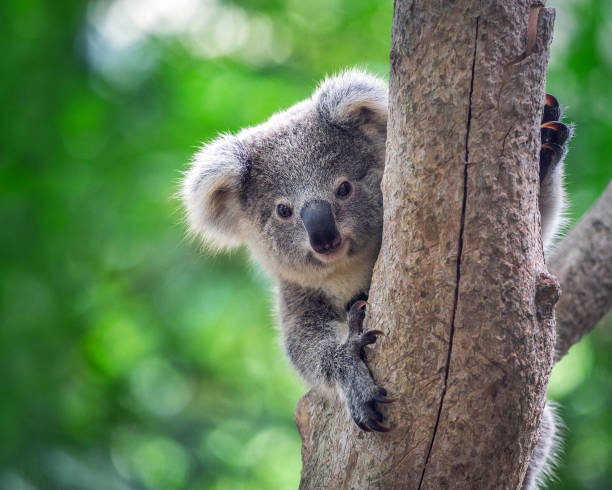

1/1 [==============================] - 1s 1s/step
105
35363/35363 [==============================] - 0s 0us/step
[[('n01882714', 'koala', 0.3286507), ('n02356798', 'fox_squirrel', 0.24762332), ('n02490219', 'marmoset', 0.13346817)]]
_________________________________________________________


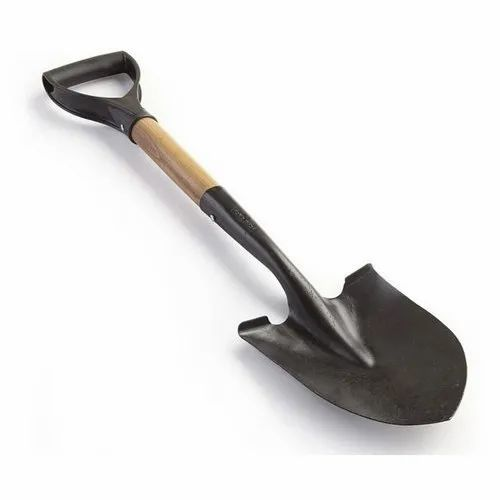

1/1 [==============================] - 1s 689ms/step
792
[[('n04208210', 'shovel', 0.92536634), ('n04270147', 'spatula', 0.024294464), ('n03498962', 'hatchet', 0.021534503)]]
_________________________________________________________


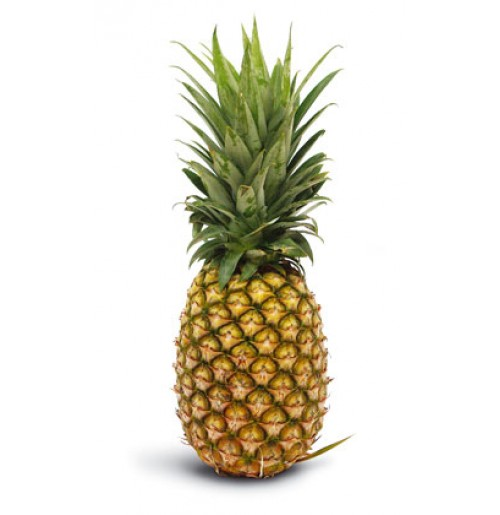

1/1 [==============================] - 1s 701ms/step
584
[[('n03476684', 'hair_slide', 0.12539974), ('n04522168', 'vase', 0.086272195), ('n07753275', 'pineapple', 0.07715019)]]
_________________________________________________________


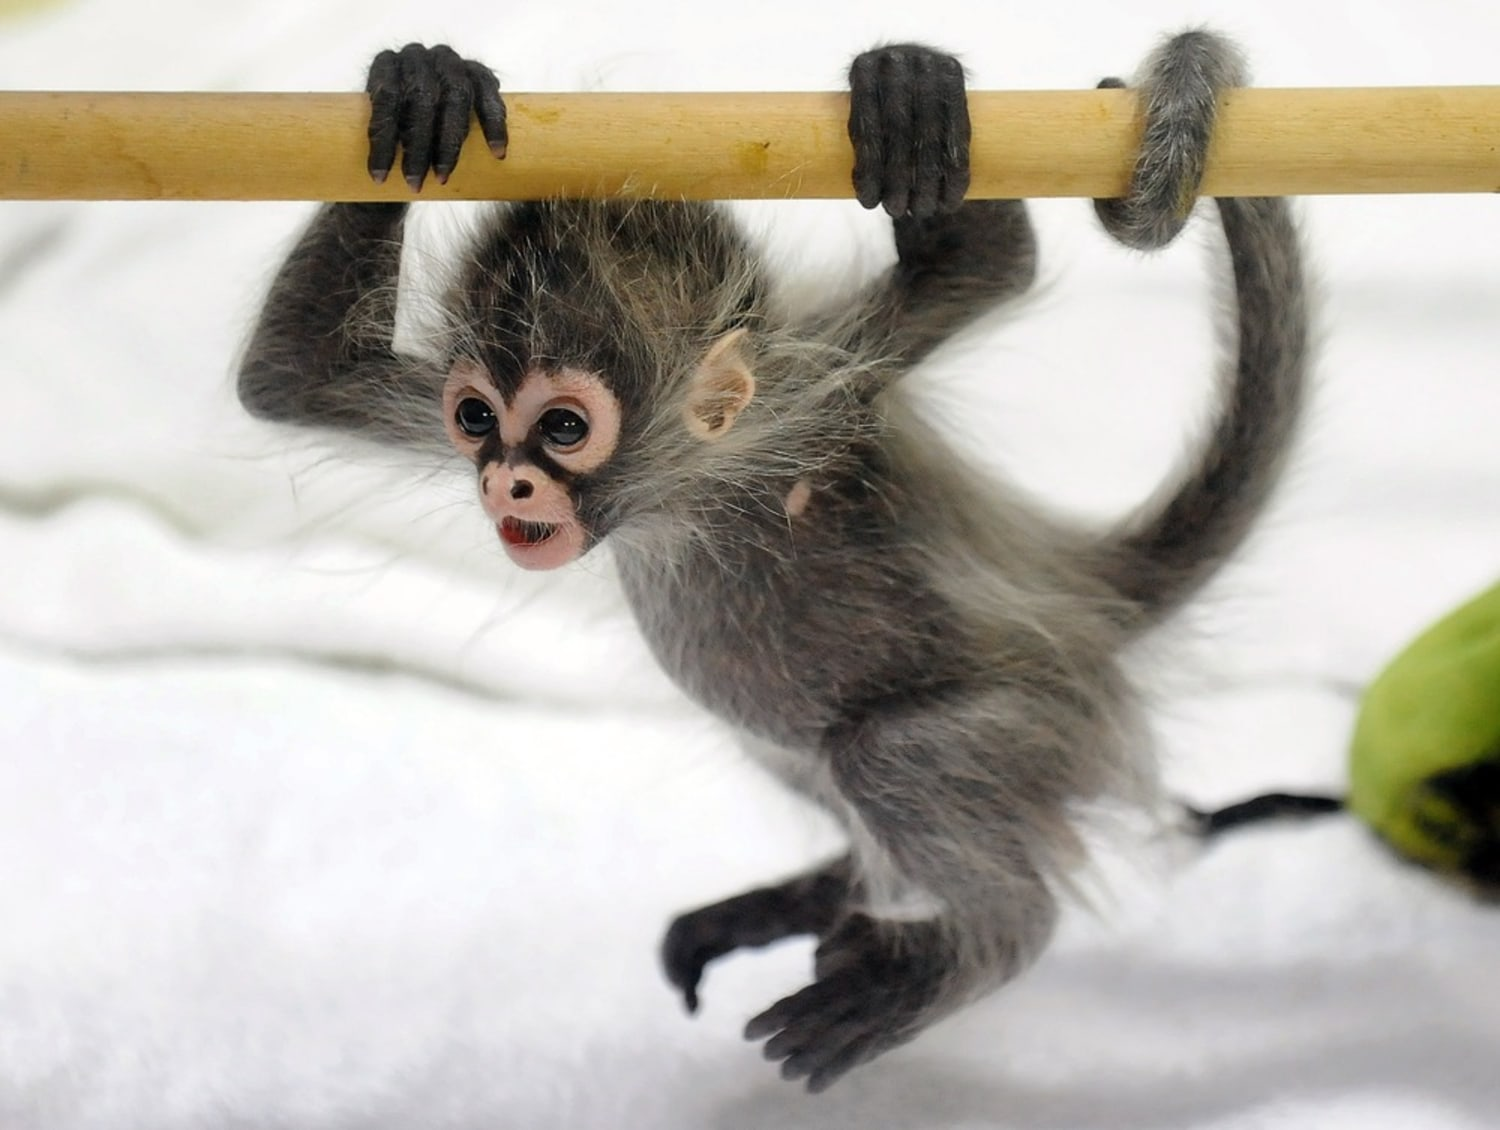

1/1 [==============================] - 1s 844ms/step
383
[[('n02497673', 'Madagascar_cat', 0.08436005), ('n02500267', 'indri', 0.08062399), ('n02484975', 'guenon', 0.07780989)]]
_________________________________________________________


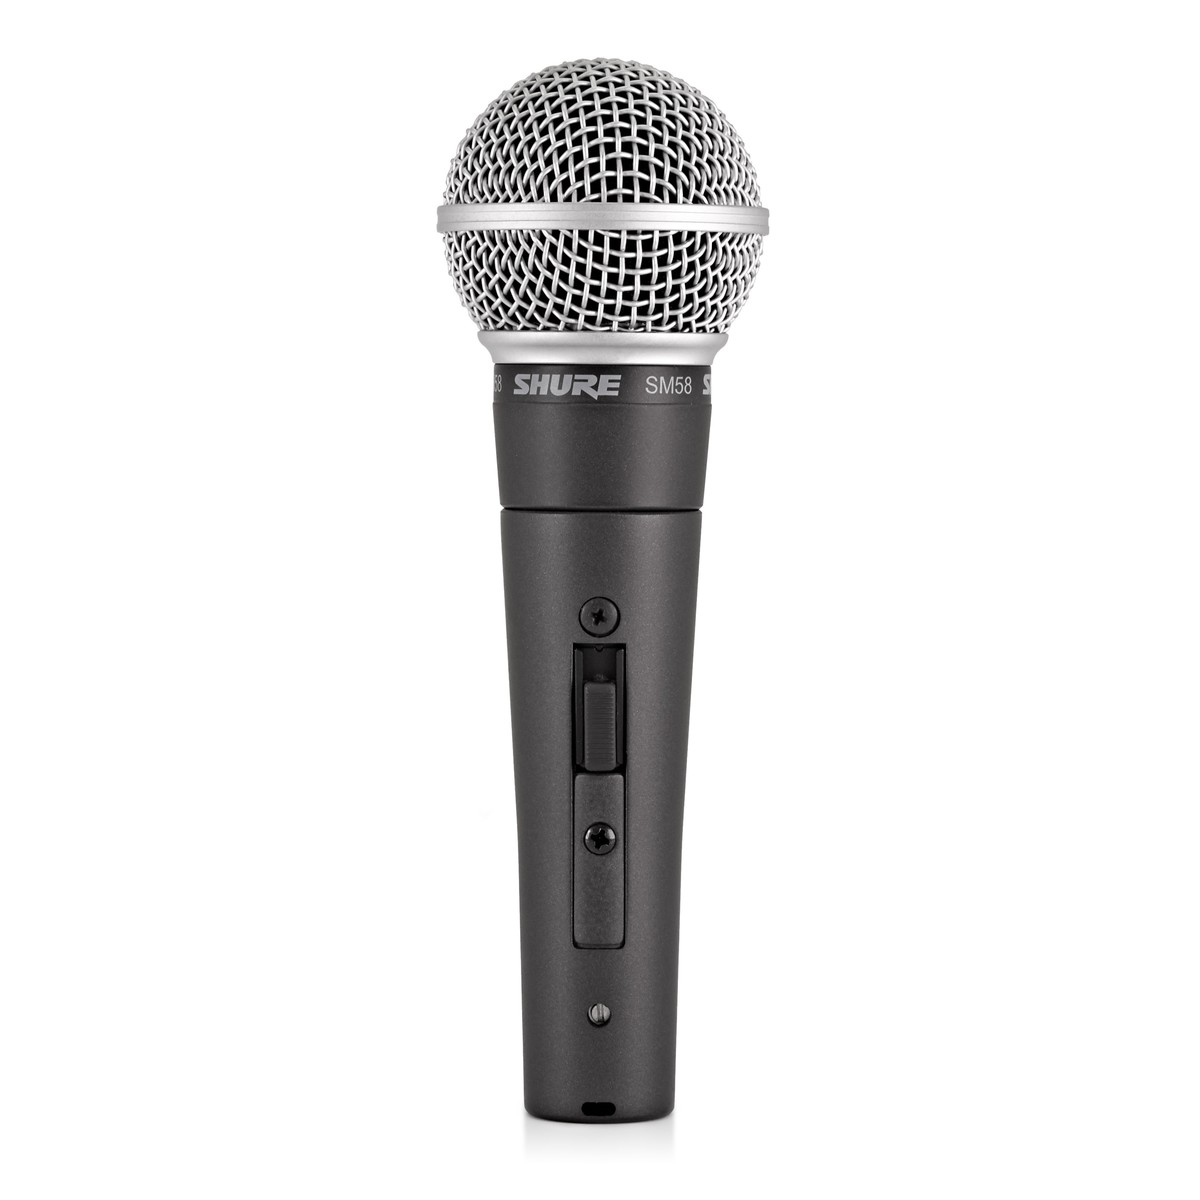

1/1 [==============================] - 1s 774ms/step
650
[[('n03759954', 'microphone', 0.9966754), ('n03483316', 'hand_blower', 0.0023309742), ('n04456115', 'torch', 0.00058364513)]]
_________________________________________________________


In [10]:
func(normilise_list, img_list)

# Задание 2. Использование обученной модели для работы со своим датасетом

## 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [18]:
# Добавляем предобученную модель ResNet50
base_model = keras.applications.ResNet50(include_top=False, # убираем полносвязные слои
                   input_shape=(180,180,3), # меняем параметры входных данных на свои
                   pooling='avg', # значение параметра означает, что после последнего сверточного слоя будет применена операция среднего пулинга
                   weights='imagenet') # указываем используемые веса (путь к файлу с предобученными весами)

base_model.summary()
base_model.get_config()

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

{'name': 'resnet50',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 180, 180, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'},
   'name': 'input_2',
   'inbound_nodes': []},
  {'class_name': 'ZeroPadding2D',
   'config': {'name': 'conv1_pad',
    'trainable': True,
    'dtype': 'float32',
    'padding': ((3, 3), (3, 3)),
    'data_format': 'channels_last'},
   'name': 'conv1_pad',
   'inbound_nodes': [[['input_2', 0, 0, {}]]]},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1_conv',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (7, 7),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Ze

## 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [12]:
#загружаем датасет по ссылке
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 6s 0us/step


/root/.keras/datasets/flower_photos/dandelion/3451646670_3eff7094b7_n.jpg


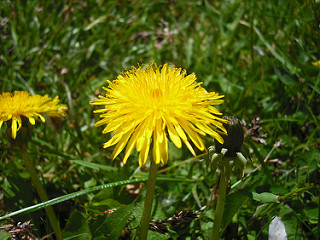

(240, 320, 3)

In [13]:
#выводим фрагмент из датасета
sunflowers = list(data_dir.glob('dandelion/*'))
image_path = sunflowers[0]
print(image_path)
image = cv2.imread(str(image_path))
cv2_imshow(image)
image.shape

In [14]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


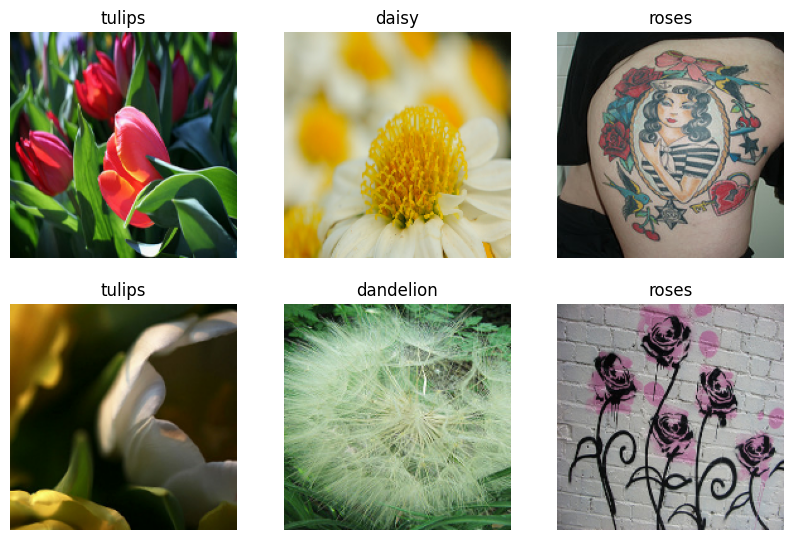

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(3):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Ваш код

## 2.3. Обучение своей модели на основе предобученной модели ResNet50

In [19]:
base_model.trainable = False 

In [20]:
my_model = Sequential()
my_model.add(base_model)
my_model.add(Flatten())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(5, activation='softmax'))

# my_model.get_config()

In [21]:
my_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
epochs=3
history = my_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs 
)

Epoch 1/3
92/92 [==============================] - 527s 6s/step - loss: 0.7650 - accuracy: 0.7650 - val_loss: 0.3776 - val_accuracy: 0.8488
Epoch 2/3
92/92 [==============================] - 493s 5s/step - loss: 0.2784 - accuracy: 0.9019 - val_loss: 0.3615 - val_accuracy: 0.8624
Epoch 3/3
92/92 [==============================] - 491s 5s/step - loss: 0.1726 - accuracy: 0.9390 - val_loss: 0.4788 - val_accuracy: 0.8392


## 2.4. Визуализация процесса обучения модели

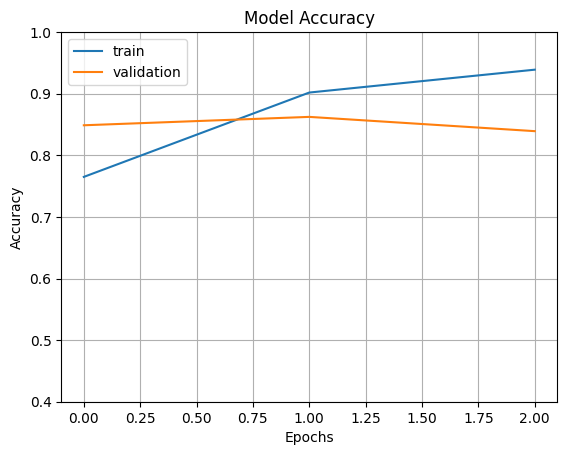

In [23]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

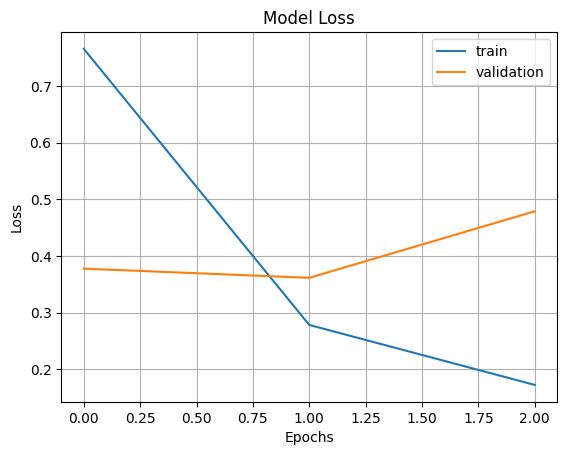

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## 2.5. Подготовка проверочного изображения

In [25]:
import cv2
image=cv2.imread(str(sunflowers[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


## 2.6. Делаем прогноз




In [26]:
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.2240925  0.74960005 0.00176784 0.00090106 0.02363842]]


In [27]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is dandelion
